In [3]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import GridSearchCV

C:\Users\User\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
train_df = pd.read_excel('meduim data - training_v3.xlsx', index_col=False)

In [5]:
test_df = pd.read_excel('testing dataset (meduim data)_v3.xlsx', index_col=False)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6503 entries, 0 to 6502
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hm0 d     6503 non-null   float64
 1   Tp d      6503 non-null   float64
 2   Tm d      6503 non-null   float64
 3   Tm1,0 d   6503 non-null   float64
 4   hdeep     6503 non-null   float64
 5   β         6503 non-null   float64
 6   Spread s  6503 non-null   float64
 7   h         6503 non-null   float64
 8   Hm0 toe   6503 non-null   float64
 9   Tp toe    6503 non-null   float64
 10  Tm toe    6503 non-null   float64
 11  Tm1,0t    6503 non-null   float64
 12  ht        6503 non-null   float64
 13  Bt        6503 non-null   float64
 14  cotαd     6503 non-null   float64
 15  cotαu     6503 non-null   float64
 16  cotαexcl  6503 non-null   float64
 17  cotαincl  6503 non-null   float64
 18  gf        6503 non-null   float64
 19  Rc        6503 non-null   float64
 20  B         6503 non-null   floa

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hm0 d     2408 non-null   float64
 1   Tp d      2408 non-null   float64
 2   Tm d      2408 non-null   float64
 3   Tm1,0 d   2408 non-null   float64
 4   hdeep     2408 non-null   float64
 5   β         2408 non-null   float64
 6   Spread s  2408 non-null   float64
 7   h         2408 non-null   float64
 8   Hm0 toe   2408 non-null   float64
 9   Tp toe    2408 non-null   float64
 10  Tm toe    2408 non-null   float64
 11  Tm1,0t    2408 non-null   float64
 12  ht        2408 non-null   float64
 13  Bt        2408 non-null   float64
 14  cotαd     2408 non-null   float64
 15  cotαu     2408 non-null   float64
 16  cotαexcl  2408 non-null   float64
 17  cotαincl  2408 non-null   float64
 18  gf        2408 non-null   float64
 19  Rc        2408 non-null   float64
 20  B         2408 non-null   floa

In [6]:
X_train = train_df[train_df.columns[:-1]]
y_train = train_df[train_df.columns[-1]]

X_test = test_df[test_df.columns[:-1]]
y_test = test_df[test_df.columns[-1]]

In [ ]:
np.isfinite (X_train)

In [ ]:
np.isfinite (y_train)

In [ ]:
np.isnan (X_train)

In [ ]:
np.isnan (y_train)

In [ ]:
# set up our search grid
param_grid = {
    "max_depth": [15,20,21,22,23,25],
    "min_child_weight": [1,3,5,7,10],
    "learning_rate": [0.02, 0.05,0.07,0.08,0.1],
    "reg_lambda": [1,2,3,5,7],
    "subsample": [0.25,0.5, 0.75, 0.85,0.9]
}

In [7]:
regressor = xgb.XGBRegressor()

In [ ]:
search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=3).fit(X_train, y_train)

In [ ]:
print("The best hyperparameters are ", search.best_params_)

In [8]:
regressor = xgb.XGBRegressor(
    learning_rate = search.best_params_["learning_rate"],
    min_child_weight  = search.best_params_["min_child_weight"],
    max_depth     = search.best_params_["max_depth"],
    reg_lambda  = search.best_params_["reg_lambda"],
    subsample     = search.best_params_["subsample"]
)

NameError: name 'search' is not defined

In [7]:
xg_reg = xgb.XGBRegressor(
    objective ='reg:squarederror', 
    learning_rate = 0.07,
    max_depth = 20, 
    min_child_weight=7,
    reg_lambda=1,
    subsample=0.5
)

In [8]:
xg_reg.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.07, max_delta_step=0,
             max_depth=20, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
preds = xg_reg.predict(X_test)

In [24]:
preds

array([-4.1531453, -4.5917068, -3.8251202, ..., -4.4677415, -4.765897 ,
       -4.679991 ], dtype=float32)

In [10]:
y_test

0      -4.469800
1      -4.469800
2      -4.471083
3      -4.471083
4      -4.471083
          ...   
2403   -6.000000
2404   -6.000000
2405   -6.000000
2406   -6.000000
2407   -6.000000
Name: log_q, Length: 2408, dtype: float64

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, preds))

In [27]:
rmse

0.7331338604308377

In [11]:
preds_df = pd.DataFrame(preds)

In [29]:
preds_df.describe()

,0
count,2408.000000
mean,-4.550343
std,0.471428
min,-6.104479
25%,-4.846657
50%,-4.528493
75%,-4.221262
max,-3.080666


In [30]:
mape = mean_absolute_percentage_error(y_test, preds)

In [31]:
mape

0.1188079805319414

In [32]:
mape*100

11.88079805319414

In [1]:
bias = (preds-y_test).sum()/len(preds)

In [15]:
bias

0.5834545519671379

In [16]:
R_sq = sklearn.metrics.r2_score(y_test, preds)

In [17]:
R_sq

-1.9260529460345404

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import sklearn
from sklearn.model_selection import GridSearchCV

%matplotlib inline

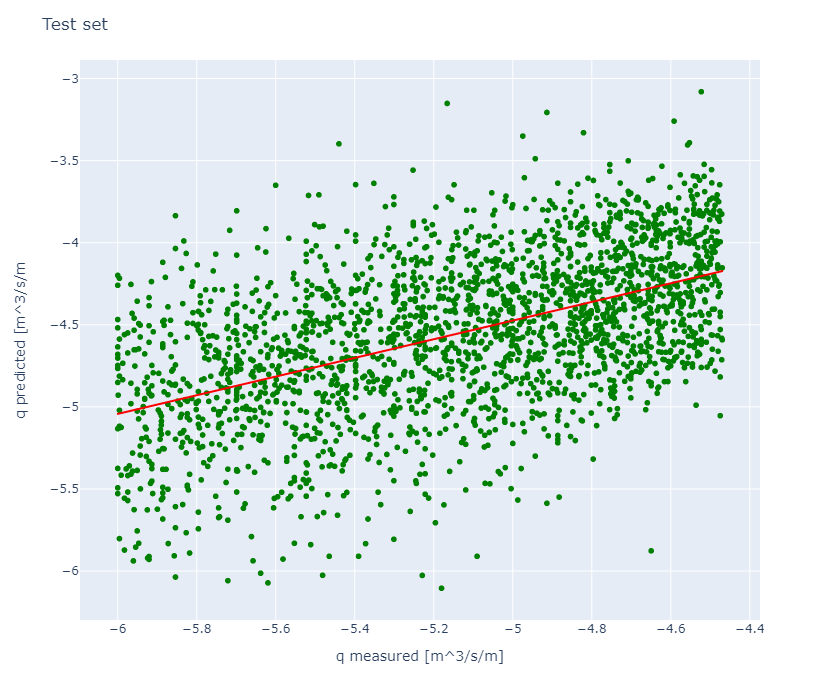

In [38]:
fig = px.scatter(x=y_test, y=preds, trendline="ols", trendline_color_override="red", width=700, height=700, )
fig.update_traces(marker=dict(color='green'))
fig.update_layout(
    title='Test set',
    xaxis_title="q measured [m^3/s/m]",
    yaxis_title="q predicted [m^3/s/m")
fig.show()
fig.write_image(f"graphsq_measure_vs_predict_test.png")